In [3]:
import pandas as pd
import os

# Show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# If needed, also expand the width
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)  # or a large int

from copy import deepcopy
from random import randint, choice
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from library.solution import Solution
from library.algorithms.hc_sa.hill_climbing import hill_climbing
from library.algorithms.hc_sa.simulated_annealing import simulated_annealing
from library.wedding_solution import Wedding_Solution
from library.wedding_sa_hc_solutions import Wedding_HillClimbingSolution, Wedding_SimulatedAnnealingSolution

from library.algorithms.hc_sa.neighborhoods import random_swap_neighborhood, greedy_swap_neighborhood

from library.run_trials_median_fitness_per_iteration import run_trials_median_fitness_per_iteration

# Import required function for the statistical tests
from library.statistical_tests import evaluate_statistical_significance_differece_algorithm_fitnesses

In [2]:
df = pd.read_csv("library/wedding_seat_data.csv")
df.head()

,idx,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,1,0,5000,0,0,700,700,0,0,0,0,0,0,0,0,0,900,900,900,300,300,300,0,500,300,300,300,300,500,100,100,0,0,0,0,0,0,100,1000,0,100,100,0,0,100,0,100,100,0,100,1000,0,0,0,1000,100,100,0,0,100,100,100,0,0,0
1,2,5000,0,700,700,0,0,300,300,500,500,300,300,300,300,500,0,0,0,0,0,0,0,0,0,0,0,0,0,100,100,0,100,0,100,100,100,0,0,100,100,100,0,0,0,100,100,100,0,100,0,100,100,0,100,100,100,0,100,0,0,0,0,0,0
2,3,0,700,0,2000,0,0,0,0,300,300,900,0,900,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,700,2000,0,0,0,900,400,300,300,0,0,0,0,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,700,700,700,400,400,400,0,300,900,400,0,400,300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 1.Hill Climbing

#### 1.1 Experimenting with random_swap_neighborhood

In [3]:
# Initialize random solution using the generalized SA class and the neighborhood function
solution = Wedding_HillClimbingSolution(
    neighborhood_function=random_swap_neighborhood,
    pretty_print_msg="Initial random swap solution"
)

print('Solution', solution)


neighbors = solution.get_neighbors()  # ← This now internally wraps representations into full instances

print('Neighbors:')
for neighbor in neighbors:
    print(neighbor.pretty_print())


Solution [5, 8, 3, 7, 7, 3, 3, 6, 3, 6, 3, 1, 7, 2, 1, 2, 6, 5, 1, 1, 8, 2, 8, 4, 7, 4, 1, 8, 4, 8, 7, 6, 8, 5, 5, 1, 2, 2, 3, 5, 6, 4, 8, 3, 5, 6, 8, 4, 2, 4, 1, 4, 5, 7, 6, 5, 1, 3, 6, 2, 2, 7, 4, 7]
Neighbors:
Final seating: [8, 8, 3, 7, 7, 3, 3, 6, 3, 6, 3, 1, 7, 2, 1, 2, 6, 5, 1, 1, 8, 2, 8, 4, 7, 4, 1, 8, 4, 8, 7, 6, 8, 5, 5, 1, 2, 2, 3, 5, 6, 4, 5, 3, 5, 6, 8, 4, 2, 4, 1, 4, 5, 7, 6, 5, 1, 3, 6, 2, 2, 7, 4, 7]
Fitness: 12300
Final seating: [5, 3, 3, 7, 7, 3, 8, 6, 3, 6, 3, 1, 7, 2, 1, 2, 6, 5, 1, 1, 8, 2, 8, 4, 7, 4, 1, 8, 4, 8, 7, 6, 8, 5, 5, 1, 2, 2, 3, 5, 6, 4, 8, 3, 5, 6, 8, 4, 2, 4, 1, 4, 5, 7, 6, 5, 1, 3, 6, 2, 2, 7, 4, 7]
Fitness: 7100
Final seating: [5, 8, 5, 7, 7, 3, 3, 6, 3, 6, 3, 1, 7, 2, 1, 2, 6, 5, 1, 1, 8, 2, 8, 4, 7, 4, 1, 8, 4, 8, 7, 6, 8, 5, 3, 1, 2, 2, 3, 5, 6, 4, 8, 3, 5, 6, 8, 4, 2, 4, 1, 4, 5, 7, 6, 5, 1, 3, 6, 2, 2, 7, 4, 7]
Fitness: 5000
Final seating: [5, 8, 3, 6, 7, 3, 3, 6, 3, 6, 3, 1, 7, 2, 1, 2, 6, 5, 1, 1, 8, 2, 8, 4, 7, 4, 1, 8, 4, 8, 7, 6, 8, 5, 5,

#### 1.2 Experimenting using greedy_swap_neighborhood

In [4]:
solution = Wedding_HillClimbingSolution(
    neighborhood_function=greedy_swap_neighborhood,
    pretty_print_msg="Initial random swap solution"
)

print('Solution', solution)


neighbors = solution.get_neighbors()  # ← This now internally wraps representations into full instances

print('Neighbors:')
for neighbor in neighbors:
    print(neighbor.pretty_print())

Solution [4, 3, 2, 6, 3, 1, 2, 2, 3, 6, 1, 5, 5, 5, 8, 1, 3, 8, 2, 1, 5, 5, 8, 6, 7, 8, 4, 4, 6, 8, 5, 4, 6, 1, 7, 7, 3, 8, 1, 7, 2, 8, 5, 4, 5, 2, 6, 6, 8, 7, 4, 3, 3, 2, 4, 6, 7, 7, 1, 3, 1, 7, 4, 2]
Neighbors:
Final seating: [4, 5, 2, 6, 3, 1, 2, 2, 3, 6, 1, 5, 5, 3, 8, 1, 3, 8, 2, 1, 5, 5, 8, 6, 7, 8, 4, 4, 6, 8, 5, 4, 6, 1, 7, 7, 3, 8, 1, 7, 2, 8, 5, 4, 5, 2, 6, 6, 8, 7, 4, 3, 3, 2, 4, 6, 7, 7, 1, 3, 1, 7, 4, 2]
Fitness: 13000
Final seating: [4, 3, 2, 6, 3, 1, 2, 2, 3, 6, 5, 5, 5, 1, 8, 1, 3, 8, 2, 1, 5, 5, 8, 6, 7, 8, 4, 4, 6, 8, 5, 4, 6, 1, 7, 7, 3, 8, 1, 7, 2, 8, 5, 4, 5, 2, 6, 6, 8, 7, 4, 3, 3, 2, 4, 6, 7, 7, 1, 3, 1, 7, 4, 2]
Fitness: 15800


### 2. Simulated Annealing

#### 2.1 Experimenting with random_swap_neighborhood

In [5]:
# Initialize random solution using the generalized SA class and the neighborhood function
solution = Wedding_SimulatedAnnealingSolution(
    neighborhood_function=random_swap_neighborhood,
    pretty_print_msg="Initial random swap SA solution"
)

print('Solution:')
print(solution.pretty_print())

# Get one random neighbor
neighbor = solution.get_random_neighbor()

print('Neighbor:')
print(neighbor.pretty_print())


Solution:
Initial random swap SA solution
Fitness: 17700
Neighbor:
Swapped person #59 at table 8 with person #49 at table 3
Fitness: 17600


#### 2.2 Experimenting using greedy_swap_neighborhood

In [6]:
solution = Wedding_SimulatedAnnealingSolution(
    neighborhood_function=greedy_swap_neighborhood,
    pretty_print_msg="Initial random swap SA solution"
)

print('Solution:')
print(solution.pretty_print())

# Get one random neighbor
neighbor = solution.get_random_neighbor()

print('Neighbor:')
print(neighbor.pretty_print())

Solution:
Initial random swap SA solution
Fitness: 7900
Neighbor:
Swapped personC #45 at table 4 with personB #28 at table 5 for personA #18
Fitness: 8700


### 3. Comparing optimization algorithms

1. Run 30 trials for:
   - HC with `random_swap`
   - HC with `actual_greedy`
   - SA with `random_swap`
   - SA with `actual_greedy`

2. For each configuration, compute:
   - `median_fitness_per_iteration` 
   - `final_fitness_values` 

3. Then:
   - **Select the best-performing configuration for HC**
   - **Select the best-performing configuration for SA**
   - Compare those two **best curves** on your final plot
   - Run a statistical test on final fitness values of each best variant (e.g., HC–ActualGreedy vs SA–ActualGreedy)


#### Table 1: Common paramaters used in all setups

| Parameter             | Value             | Justification                                                 |
|-----------------------|-------------------|---------------------------------------------------------------|
| Number of trials      | 30                | Standard for statistical averaging                            |
| Number of iterations  | 100               | Enough to show convergence behavior without being too slow    |
| Optimization goal     | Maximize          | Based on your fitness function setup                          |


#### Table 2: Parameter Combinations to Try – HC + SA 

##### Hill Climbing (HC) — vary only neighborhood

| Neighborhood Function             | Label                      |
|----------------------------------|----------------------------|
| `random_swap_neighborhood`       | HC – Random Swap           |
| `greedy_swap_neighborhood`| HC – Actual Greedy Swap    |


##### Simulated Annealing (SA) — parameters fixed +  vary neighborhood 

1. Defined paramater values:
- Due to time constraints and since we are only using the SA optimization algorithm as baseline model to compare with the Genetic algorithms we decided to fix the values for C, L and H.

| Parameter | Value | Justification |
|-----------|-------|---------------|
| C (float): Probability control parameter | 100 | As per Vaneshi et al the algorithm should start with high values of C since at the beginning of its execution the algorithm may be in a difficult area of the search space where going downhill with reasonably high probability can be useful to step over some hills |
| H (float): Decreasing rate of C | 1.01 | As per Vaneshi et al, we start with high value of C to step ober some hills and avoid geting stuck in local optima but we then want the value of C to be decreased across iterations as the algorithm hoepfully becomes closer to the global optima hill as per the basis of atraction. hence at this point we want the algorithm to have a lower porbability of acceptign worse solutions and behaving similarly to HC<br><br>We chose 1.01 as Vaneshi et al mentions that "c could be divided by a constant that is “slightly” larger than 1." |
| L (int): Number of iterations with same C | 30 | In Vaneshi et al it's mentioned that "in order to maximize our chances of finding a global optimum, all we can do is execute a large number of transitions for each value of the control parameter, and decrease the control parameter slowly, in such a way that the total number of itera- tions performed is as large as possible."<br><br>Considering our computational limitations we defined L = 30 to still allow |


2. Define the combinations going to be experiemnted with

| Algorithm | Neighborhood Function               | Label                   | Notes                                |
|-----------|-------------------------------------|-------------------------|--------------------------------------|
| SA        | `random_swap_neighborhood`          | SA - Random Swap        | Uses fixed C, L, H (from Vaneshi et al) |
| SA        | `greedy_swap_neighborhood`   | SA - Actual Greedy      | Uses fixed C, L, H (from Vaneshi et al)                                    |



#### 3.1 Obtaining best configuration for HC

##### 3.1.1 HC - Random Swap 

In [7]:
hc_rs_best_solutions, hc_rs_all_fitness_histories, hc_rs_median_fitness_per_iter, hc_rs_trial_durations = run_trials_median_fitness_per_iteration(
    optimization_algo="HC",
    neighborhood_function=random_swap_neighborhood,
    trials=30, # Change to 30
    max_iter=100,
    verbose=False,

)

Trial 1/30
Trial duration: 37.08 seconds
Number of iterations:  31
Neighborhood: random_swap_neighborhood
Best solution fitness: 66600
Trial 2/30
Trial duration: 31.27 seconds
Number of iterations:  25
Neighborhood: random_swap_neighborhood
Best solution fitness: 57100
Trial 3/30
Trial duration: 33.53 seconds
Number of iterations:  27
Neighborhood: random_swap_neighborhood
Best solution fitness: 63100
Trial 4/30
Trial duration: 29.29 seconds
Number of iterations:  24
Neighborhood: random_swap_neighborhood
Best solution fitness: 65900
Trial 5/30
Trial duration: 27.6 seconds
Number of iterations:  24
Neighborhood: random_swap_neighborhood
Best solution fitness: 64600
Trial 6/30
Trial duration: 22.58 seconds
Number of iterations:  20
Neighborhood: random_swap_neighborhood
Best solution fitness: 55300
Trial 7/30
Trial duration: 25.88 seconds
Number of iterations:  23
Neighborhood: random_swap_neighborhood
Best solution fitness: 58400
Trial 8/30
Trial duration: 23.98 seconds
Number of itera

In [24]:
folder_path = os.path.join(os.getcwd(), "ModelResults", "HC", "Trial_results_random_swap_neighborhood")

hc_rs_best_solutions = pd.read_csv(f"{folder_path}/best_solutions_20250515_192923.csv")["Fitness"].tolist()
hc_rs_all_fitness_histories = pd.read_csv(f"{folder_path}/all_fitness_histories_20250515_192923.csv").values.tolist()
hc_rs_median_fitness_per_iter = pd.read_csv(f"{folder_path}/median_fitness_per_iteration_20250515_192923.csv")["MedianFitness"].tolist()
hc_rs_trial_durations = pd.read_csv(f"{folder_path}/trial_durations_20250515_192923.csv")["TrialDurations"].tolist()


In [25]:
# Metric 1 - Median of the fitnesses of the best solutions

hc_rs_best_median_fitness = np.median(hc_rs_best_solutions)
print("Best median fitness across all trials: ", hc_rs_best_median_fitness)

Best median fitness across all trials:  61850.0


In [26]:
# Metric 2 - Median Speed of convergence
hc_rs_best_median_speed_of_convergence = np.median(hc_rs_trial_durations)
print(f"Best median speed of convergence across all trials: {hc_rs_best_median_speed_of_convergence} seconds")

Best median speed of convergence across all trials: 28.77 seconds


In [27]:
# Metric 3 - Standard Deviation of best solutions fitness
hc_rs_best_solutions_fitness_std = np.std(hc_rs_best_solutions)
print(f"Standard deviation of best solutions fitness: {hc_rs_best_solutions_fitness_std}")

Standard deviation of best solutions fitness: 4908.519804041404


##### 3.1.2 HC - Greedy Swap 

In [10]:
hc_gs_best_solutions, hc_gs_all_fitness_histories, hc_gs_median_fitness_per_iter, hc_gs_trial_durations = run_trials_median_fitness_per_iteration(
    optimization_algo="HC",
    neighborhood_function=greedy_swap_neighborhood,
    trials=30, # Change to 30
    max_iter=100,
    verbose=False,

)

Trial 1/30
Trial duration: 0.65 seconds
Number of iterations:  8
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 25600
Trial 2/30
Trial duration: 2.47 seconds
Number of iterations:  20
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 48000
Trial 3/30
Trial duration: 1.27 seconds
Number of iterations:  11
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 25800
Trial 4/30
Trial duration: 1.35 seconds
Number of iterations:  17
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 38700
Trial 5/30
Trial duration: 0.74 seconds
Number of iterations:  9
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 23300
Trial 6/30
Trial duration: 1.9 seconds
Number of iterations:  11
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 30800
Trial 7/30
Trial duration: 0.82 seconds
Number of iterations:  5
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 18600
Trial 8/30
Trial duration: 0.49 seconds
Number of iterations:  5
N

In [28]:
folder_path = os.path.join(os.getcwd(), "ModelResults", "HC", "Trial_results_greedy_swap_neighborhood")

hc_gs_best_solutions = pd.read_csv(f"{folder_path}/best_solutions_20250515_194354.csv")["Fitness"].tolist()
hc_gs_all_fitness_histories = pd.read_csv(f"{folder_path}/all_fitness_histories_20250515_194354.csv").values.tolist()
hc_gs_median_fitness_per_iter = pd.read_csv(f"{folder_path}/median_fitness_per_iteration_20250515_194354.csv")["MedianFitness"].tolist()
hc_gs_trial_durations = pd.read_csv(f"{folder_path}/trial_durations_20250515_194354.csv")["TrialDurations"].tolist()


In [29]:
# Metric 1 - Median of the fitnesses of the best solutions
#hc_gs_best_solutions_fitness = [solution.fitness() for solution in hc_gs_best_solutions]
hc_gs_best_median_fitness = np.median(hc_gs_best_solutions)
print("Best median fitness across all trials: ", hc_gs_best_median_fitness)

Best median fitness across all trials:  29700.0


In [30]:
# Metric 2 - Median Speed of convergence
hc_gs_best_median_speed_of_convergence = np.median(hc_gs_trial_durations)
print(f"Best median speed of convergence across all trials: {hc_gs_best_median_speed_of_convergence} seconds")

Best median speed of convergence across all trials: 1.2149999999999999 seconds


In [31]:
# Metric 3 - Standard Deviation of best solutions fitness
hc_gs_best_solutions_fitness_std = np.std(hc_gs_best_solutions)
print(f"Standard deviation of best solutions fitness: {hc_gs_best_solutions_fitness_std}")


Standard deviation of best solutions fitness: 6962.279320260955


##### 3.1.3 Comparing the Median final fitness and Median convergence speed between Random Swap and Greedy Swap 

In [32]:
neighborhood_functions = ["HC - Random Swap", "HC - Greedy Swap"]
median_fitness_values = [
    hc_rs_best_median_fitness,
    hc_gs_best_median_fitness
]
median_speed_of_convergence_values = [
    hc_rs_best_median_speed_of_convergence,
    hc_gs_best_median_speed_of_convergence
]
std_fitness_values = [
    hc_rs_best_solutions_fitness_std,
    hc_gs_best_solutions_fitness_std
]
# Create a DataFrame to display the results
median_fitness_df = pd.DataFrame({
    "Neighborhood Function": neighborhood_functions,
    "Median Final Fitness": median_fitness_values,
    "Median Speed of Convergence (seconds)": median_speed_of_convergence_values,
    "Standard Deviation of Best Solutions Fitness": std_fitness_values
})
median_fitness_df = median_fitness_df.set_index("Neighborhood Function")
median_fitness_df = median_fitness_df.sort_values(by="Median Final Fitness", ascending=False)
# Display the DataFrame
print(median_fitness_df)


                       Median Final Fitness  \
Neighborhood Function                         
HC - Random Swap                    61850.0   
HC - Greedy Swap                    29700.0   

                       Median Speed of Convergence (seconds)  \
Neighborhood Function                                          
HC - Random Swap                                      28.770   
HC - Greedy Swap                                       1.215   

                       Standard Deviation of Best Solutions Fitness  
Neighborhood Function                                                
HC - Random Swap                                        4908.519804  
HC - Greedy Swap                                        6962.279320  


##### 3.1.4 Test if the differences in median fitness are statistically significant 

In [33]:
# Evaluate statistical significance between the HC - Random Swap and HC - Greedy Swap
statistical_test_results = evaluate_statistical_significance_differece_algorithm_fitnesses(
    hc_rs_best_solutions,
    hc_gs_best_solutions,
    "HC - Random Swap",
    "HC - Greedy Swap"
)



Mann–Whitney U test between HC - Random Swap and HC - Greedy Swap:
  Test Statistic = 900.0000
  p-value        = 0.00000
  Result: Statistically significant difference (p < 0.05)


##### 3.1.5 Boxplot for best solutions fitnesses to evaluate the stability and consistency of HC - Random Swap vs HC - Greedy Swap


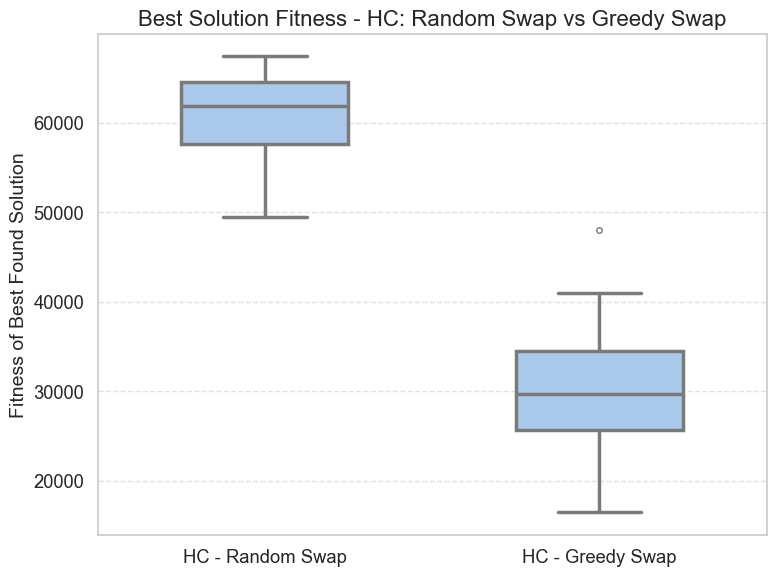

In [34]:
data = []
for value in hc_rs_best_solutions:
    data.append({'value': value, 'group': 'HC - Random Swap'})
for value in hc_gs_best_solutions:
    data.append({'value': value, 'group': 'HC - Greedy Swap'})

df_long = pd.DataFrame(data)

# Seaborn styling 
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='group', y='value', data=df_long, width=0.5, linewidth=2.5, fliersize=4)

# Titles and labels
plt.title('Best Solution Fitness - HC: Random Swap vs Greedy Swap', fontsize=16)
plt.ylabel('Fitness of Best Found Solution', fontsize=14)
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


##### 3.1.6 Final decision --> HC Random Swap 

> HC – Random Swap achieved a higher median final fitness (61,850 vs. 29,700) than Greedy Swap. This shows that HC - Ramdom Swap is more effective at escaping local optima and exploring diverse solutions.

> While slower (28.77s vs. 1.22s), its improved solution quality justifies the additional computation time.

> A statistical analysis (p < 0.0001) confirms that the difference in performance is statistically significant

> Random Swap showed lower standard deviation (≈4908 vs. 6962) and less variability in the boxplot, indicating more consistent performance across trials.

> Greedy Swap’s weakness is related to its limited neighborhood diversity. By only considering valued relationships, it causes premature convergence and poor general performance.

#### 3.2 Obtaining best configuration for SA

##### 3.2.1 SA - Random Swap 

In [15]:
sa_rs_best_solutions, sa_rs_all_fitness_histories, sa_rs_median_fitness_per_iter, sa_rs_trial_durations = run_trials_median_fitness_per_iteration(
    optimization_algo="SA",
    neighborhood_function=random_swap_neighborhood,
    trials=30, # Change to 30
    max_iter=100,
    verbose=False,

)

Trial 1/30
Trial duration: 19.39 seconds
Number of iterations:  101
Neighborhood: random_swap_neighborhood
Best solution fitness: 67700
Trial 2/30
Trial duration: 20.51 seconds
Number of iterations:  101
Neighborhood: random_swap_neighborhood
Best solution fitness: 63500
Trial 3/30
Trial duration: 22.29 seconds
Number of iterations:  101
Neighborhood: random_swap_neighborhood
Best solution fitness: 65600
Trial 4/30
Trial duration: 20.55 seconds
Number of iterations:  101
Neighborhood: random_swap_neighborhood
Best solution fitness: 65900
Trial 5/30
Trial duration: 21.03 seconds
Number of iterations:  101
Neighborhood: random_swap_neighborhood
Best solution fitness: 69900
Trial 6/30
Trial duration: 19.07 seconds
Number of iterations:  101
Neighborhood: random_swap_neighborhood
Best solution fitness: 65200
Trial 7/30
Trial duration: 20.67 seconds
Number of iterations:  101
Neighborhood: random_swap_neighborhood
Best solution fitness: 64500
Trial 8/30
Trial duration: 20.3 seconds
Number o

In [36]:
folder_path = os.path.join(os.getcwd(), "ModelResults", "SA", "Trial_results_random_swap_neighborhood")

sa_rs_best_solutions = pd.read_csv(f"{folder_path}/best_solutions_20250515_194432.csv")["Fitness"].tolist()
sa_rs_all_fitness_histories = pd.read_csv(f"{folder_path}/all_fitness_histories_20250515_194432.csv").values.tolist()
sa_rs_median_fitness_per_iter = pd.read_csv(f"{folder_path}/median_fitness_per_iteration_20250515_194432.csv")["MedianFitness"].tolist()
sa_rs_trial_durations = pd.read_csv(f"{folder_path}/trial_durations_20250515_194432.csv")["TrialDurations"].tolist()


In [37]:
# Metric 1 - Median of the fitnesses of the best solutions
#sa_rs_best_solutions_fitness = [solution.fitness() for solution in sa_rs_best_solutions]
#sa_rs_best_median_fitness = np.median(sa_rs_best_solutions_fitness)

sa_rs_best_median_fitness = np.median(sa_rs_best_solutions)
print("Best median fitness across all trials: ", sa_rs_best_median_fitness)


Best median fitness across all trials:  66700.0


In [38]:
# Metric 2 - Median Speed of convergence
sa_rs_best_median_speed_of_convergence = np.median(sa_rs_trial_durations)
print(f"Best median speed of convergence across all trials: {sa_rs_best_median_speed_of_convergence} seconds")

Best median speed of convergence across all trials: 20.5 seconds


In [39]:
# Metric 3 - Standard Deviation of best solutions fitness
sa_rs_best_solutions_fitness_std = np.std(sa_rs_best_solutions)
print(f"Standard deviation of best solutions fitness: {sa_rs_best_solutions_fitness_std}")

Standard deviation of best solutions fitness: 2770.9685430669665


##### 3.2.2 SA - Greedy Swap 

In [18]:
sa_gs_best_solutions, sa_gs_all_fitness_histories, sa_gs_median_fitness_per_iter, sa_gs_trial_durations = run_trials_median_fitness_per_iteration(
    optimization_algo="SA",
    neighborhood_function=greedy_swap_neighborhood,
    trials=30, # Change to 30
    max_iter=100,
    verbose=False,

)

Trial 1/30
Trial duration: 22.39 seconds
Number of iterations:  101
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 72400
Trial 2/30
Trial duration: 17.26 seconds
Number of iterations:  101
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 70400
Trial 3/30
Trial duration: 19.47 seconds
Number of iterations:  101
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 71900
Trial 4/30
Trial duration: 22.86 seconds
Number of iterations:  101
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 66600
Trial 5/30
Trial duration: 19.39 seconds
Number of iterations:  101
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 76200
Trial 6/30
Trial duration: 19.75 seconds
Number of iterations:  101
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 75100
Trial 7/30
Trial duration: 18.12 seconds
Number of iterations:  101
Neighborhood: greedy_swap_neighborhood
Best solution fitness: 72300
Trial 8/30
Trial duration: 19.43 seconds
Number 

In [ ]:
folder_path = os.path.join(os.getcwd(), "ModelResults", "SA", "Trial_results_greedy_swap_neighborhood")

sa_gs_best_solutions = pd.read_csv(f"{folder_path}/best_solutions_20250515_195453.csv")["Fitness"].tolist()
sa_gs_all_fitness_histories = pd.read_csv(f"{folder_path}/all_fitness_histories_20250515_195453.csv").values.tolist()
sa_gs_median_fitness_per_iter = pd.read_csv(f"{folder_path}/median_fitness_per_iteration_20250515_195453.csv")["MedianFitness"].tolist()
sa_gs_trial_durations = pd.read_csv(f"{folder_path}/trial_durations_20250515_195453.csv")["TrialDurations"].tolist()


In [41]:
# Metric 1 - Median of the fitnesses of the best solutions
#sa_gs_best_solutions_fitness = [solution.fitness() for solution in sa_gs_best_solutions]
#sa_gs_best_median_fitness = np.median(sa_gs_best_solutions_fitness)
sa_gs_best_median_fitness = np.median(sa_gs_best_solutions)
print("Best median fitness across all trials: ", sa_gs_best_median_fitness)


Best median fitness across all trials:  72800.0


In [42]:
# Metric 2 - Median Speed of convergence
sa_gs_best_median_speed_of_convergence = np.median(sa_gs_trial_durations)
print(f"Best median speed of convergence across all trials: {sa_gs_best_median_speed_of_convergence} seconds")

Best median speed of convergence across all trials: 19.355 seconds


In [43]:
# Metric 3 - Standard Deviation of best solutions fitness
sa_gs_best_solutions_fitness_std = np.std(sa_gs_best_solutions)
print(f"Standard deviation of best solutions fitness: {sa_gs_best_solutions_fitness_std}")

Standard deviation of best solutions fitness: 2163.6928309412747


##### 3.2.3 Comparing the Median final fitness and Median convergence speed between SA - Random Swap and SA - Greedy Swap 

In [37]:
neighborhood_functions = ["SA - Random Swap", "SA - Greedy Swap"]
median_fitness_values = [
    sa_rs_best_median_fitness,
    sa_gs_best_median_fitness
]
median_speed_of_convergence_values = [
    sa_rs_best_median_speed_of_convergence,
    sa_gs_best_median_speed_of_convergence
]
std_fitness_values = [
    sa_rs_best_solutions_fitness_std,
    sa_gs_best_solutions_fitness_std
]
# Create a DataFrame to display the results
median_fitness_df = pd.DataFrame({
    "Neighborhood Function": neighborhood_functions,
    "Median Final Fitness": median_fitness_values,
    "Median Speed of Convergence (seconds)": median_speed_of_convergence_values,
    "Standard Deviation of Best Solutions Fitness": std_fitness_values
})

median_fitness_df = median_fitness_df.set_index("Neighborhood Function")
median_fitness_df = median_fitness_df.sort_values(by="Median Final Fitness", ascending=False)
#Display the DataFrame
print(median_fitness_df)

                       Median Final Fitness  \
Neighborhood Function                         
SA - Greedy Swap                    72800.0   
SA - Random Swap                    66700.0   

                       Median Speed of Convergence (seconds)  \
Neighborhood Function                                          
SA - Greedy Swap                                      19.355   
SA - Random Swap                                      20.500   

                       Standard Deviation of Best Solutions Fitness  
Neighborhood Function                                                
SA - Greedy Swap                                        2163.692831  
SA - Random Swap                                        2770.968543  


##### 3.2.4 Test if the differences in median fitness are statistically significant 

In [44]:
# Evaluate statistical significance between the SA - Random Swap and SA - Greedy Swap
statistical_test_results = evaluate_statistical_significance_differece_algorithm_fitnesses(
    sa_rs_best_solutions,
    sa_gs_best_solutions,
    "SA - Random Swap",
    "SA - Greedy Swap"
)



Mann–Whitney U test between SA - Random Swap and SA - Greedy Swap:
  Test Statistic = 51.0000
  p-value        = 0.00000
  Result: Statistically significant difference (p < 0.05)


##### 3.2.5 Boxplot for best solutions fitnesses to evaluate the stability and consistency of SA - Random Swap vs SA - Greedy Swap


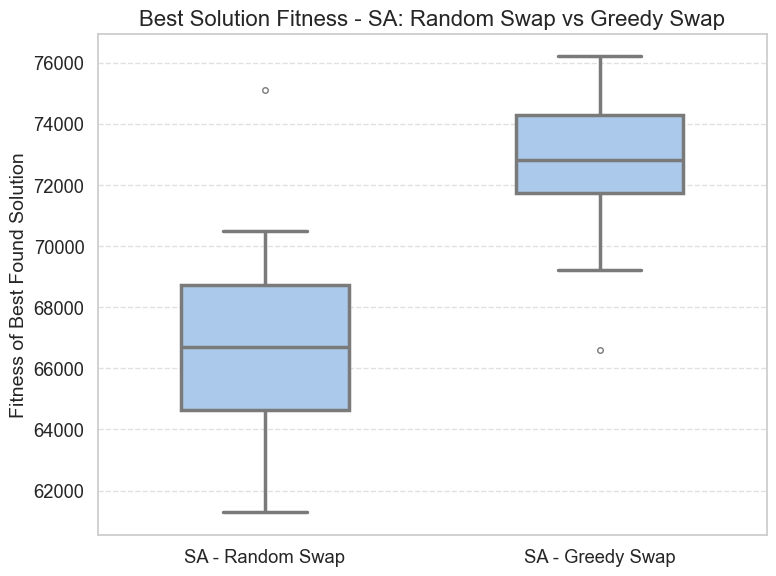

In [45]:
data = []
for value in sa_rs_best_solutions:
    data.append({'value': value, 'group': 'SA - Random Swap'})
for value in sa_gs_best_solutions:
    data.append({'value': value, 'group': 'SA - Greedy Swap'})
df_long = pd.DataFrame(data)

# Seaborn styling
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)
# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='group', y='value', data=df_long, width=0.5, linewidth=2.5, fliersize=4)
# Titles and labels
plt.title('Best Solution Fitness - SA: Random Swap vs Greedy Swap', fontsize=16)
plt.ylabel('Fitness of Best Found Solution', fontsize=14)
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 3.2.6 Final decision --> SA Greedy Swap 

> Among the two neighborhood operators tested for Simulated Annealing, Greedy Swap outperformed Random Swap, achieving a higher median final fitness (72,800 vs. 66,700) and a slightly faster convergence speed (19.355s vs. 20.5s).

> A t-test confirmed the statistical significance of this difference (p < 0.0001).

> In terms of stability, Greedy Swap also showed lower standard deviation of best solution fitness (2163 vs. 2770), indicating more consistent performance across trials. This is further supported by the boxplot, which shows tighter interquartile range

> The difference in behavior between HC and SA in relation to their performance with the Greedy Swap is likely related to how the algorithms explore the search space. Hill Climbing accepts only improving moves, which causes Greedy Swap to quickly get stuck in local optima. In contrast, SA occasionally accepts worse solutions, allowing it to escape local optima and benefiting from the selection of swaps only among people with predefined valued relationships 

#### 3.3 Evaluating the Top Configurations of HC and SA

##### 3.3.1 Comparing the Median final fitness and Median convergence speed between HC - Random Swap and SA - Greedy Swap 

In [39]:
neighborhood_functions = ["HC - Random Swap", "SA - Greedy Swap"]
median_fitness_values = [
    hc_rs_best_median_fitness,
    sa_gs_best_median_fitness,
    ]

median_speed_of_convergence_values = [
    hc_rs_best_median_speed_of_convergence,
    sa_gs_best_median_speed_of_convergence
]
std_fitness_values = [
    hc_rs_best_solutions_fitness_std,
    sa_gs_best_solutions_fitness_std
]
# Create a DataFrame to display the results

median_fitness_df = pd.DataFrame({
    "Neighborhood Function": neighborhood_functions,
    "Median Final Fitness": median_fitness_values,
    "Median Speed of Convergence (seconds)": median_speed_of_convergence_values,
    "Standard Deviation of Best Solutions Fitness": std_fitness_values
})
median_fitness_df = median_fitness_df.set_index("Neighborhood Function")
median_fitness_df = median_fitness_df.sort_values(by="Median Final Fitness", ascending=False)
#Display the DataFrame
print(median_fitness_df)

                       Median Final Fitness  \
Neighborhood Function                         
SA - Greedy Swap                    72800.0   
HC - Random Swap                    61850.0   

                       Median Speed of Convergence (seconds)  \
Neighborhood Function                                          
SA - Greedy Swap                                      19.355   
HC - Random Swap                                      28.770   

                       Standard Deviation of Best Solutions Fitness  
Neighborhood Function                                                
SA - Greedy Swap                                        2163.692831  
HC - Random Swap                                        4908.519804  


##### 3.3.2 Test if the differences in median fitness are statistically significant 

In [46]:
#Evaluate statistical significance between the HC - Random Swap and HC - Greedy Swap

statistical_test_results = evaluate_statistical_significance_differece_algorithm_fitnesses(
    hc_rs_best_solutions,
    sa_gs_best_solutions,
    "HC - Random Swap",
    "SA - Greedy Swap"
)


Mann–Whitney U test between HC - Random Swap and SA - Greedy Swap:
  Test Statistic = 3.5000
  p-value        = 0.00000
  Result: Statistically significant difference (p < 0.05)


##### 3.3.3 Boxplot for best solutions fitnesses to evaluate the stability and consistency of HC - Random Swap vs SA - Greedy Swap


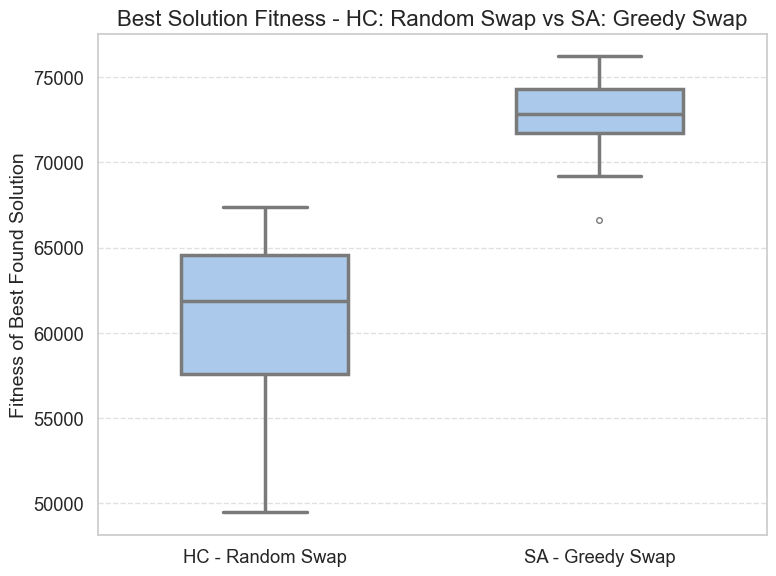

In [47]:
data = []
for value in hc_rs_best_solutions:
    data.append({'value': value, 'group': 'HC - Random Swap'})

for value in sa_gs_best_solutions:
    data.append({'value': value, 'group': 'SA - Greedy Swap'})

# Create a DataFrame for the boxplot
df_long = pd.DataFrame(data)

# Seaborn styling
sns.set_theme(style="whitegrid", palette="pastel", font_scale=1.2)
# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='group', y='value', data=df_long, width=0.5, linewidth=2.5, fliersize=4)
# Titles and labels
plt.title('Best Solution Fitness - HC: Random Swap vs SA: Greedy Swap', fontsize=16)
plt.ylabel('Fitness of Best Found Solution', fontsize=14)
plt.xlabel('')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### 3.3.3 Final decision --> SA - Greedy Swap

> Simulated Annealing with Greedy Swap achieved a higher median final fitness (72,800) and better convergence time (19.36s) compared to Hill Climbing with Random Swap (61,850 fitness, 28.77s). This shows that SA is more effective at exploring the search space and escaping poor local solutions.

> The statistical analysis confirmed that the performance difference between SA and HC is statistically significant (p < 0.001). 

> In terms of stability, SA–Greedy Swap also had a lower standard deviation (2,163 vs. 4,908) and a more compact boxplot distribution, reflecting more consistent performance across trials.

> The selection of the SA in favour of the HC can be explained by the fact that SA improves upon HC by occasionally accepting worse solutions, allowing it to escape local optima. As Vanneschi et al. state, "Always blindly following fitness... can be a losing strategy for an optimization algorithm," which is a key weakness of HC. SA addresses this by allowing with some proabbility the acceptance of worse solutions making it more able to escape local optima and more suitable for complex, real-world optimization problems.


### 4 General notes about Statistical Significance Evaluation


> **Note – Statistical Significance Evaluation**
>
> According to `Venachi et al.`, when comparing the performance of different optimization configurations (e.g., different variants of Genetic Algorithms, Hill Climbing, or Simulated Annealing), it is important to assess whether the observed differences are **statistically significant**.
>
> While it is possible to run statistical tests at each generation (i.e., per-iteration analysis), this is rarely done in practice due to complexity and the risk of multiple comparisons. Instead, it is typical and sufficient to evaluate significance **only at termination**, by comparing the **final fitness values** obtained across multiple independent runs.
>
> The recommended procedure is as follows:
>
> 1. **Run multiple trials** (e.g., 30) for each configuration being compared.
> 2. **Extract the final fitness value** from each trial (usually the best fitness in the last generation or iteration).
> 3. **Check for normality** in the fitness distributions using the `Kolmogorov–Smirnov test`.
> 4. Based on the normality result:
>    - If both samples are normally distributed, apply a `Student’s t-test`.
>    - If at least one sample is not normal, use a **non-parametric test**, such as the `Mann–Whitney U test` (the one we will use), **Wilcoxon rank-sum**, or **Kruskal–Wallis**.
> 5. **Interpret the p-value**:
>    - If **p < 0.05**, the difference is statistically significant.
>    - Otherwise, we conclude that the difference may be due to chance.
>
> This approach ensures that the evaluation of algorithm performance is both statistically valid and aligned with established scientific practice.


`One-Sample Kolmogorov–Smirnov (K–S) Test for Normality`

1. Null Hypothesis (H₀):
The data follow a **standard normal distribution** (i.e., mean = 0, standard deviation = 1).

2. Alternative Hypothesis (H₁):
The data do **not** follow a standard normal distribution.

3. Test Statistic:
The Kolmogorov–Smirnov test statistic **D** is defined as:

$$
D = \max_{1 \leq i \leq N} \left( F(Y_i) - \frac{i - 1}{N}, \frac{i}{N} - F(Y_i) \right)
$$

where \( F \) is the cumulative distribution function (CDF) of the **standard normal distribution**.

4. Assumptions:
- The distribution being tested (standard normal) is **fully specified**, i.e., with fixed parameters (μ = 0, σ = 1).
- The data must be **continuous**.
- The test is sensitive to differences in both **location** and **shape**.

5. Notes:
- To satisfy the assumption of a fully specified distribution, we had to **standardize our data first**


`Two-Sample t-Test`
1. **Null Hypothesis (H₀):** μ₁ = μ₂  
2. **Alternative Hypothesis (H₁):** μ₁ ≠ μ₂ (or one-sided if specified)

3. **Test Statistic:**

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

**where:**

- \( \bar{x}_i \): sample mean of group *i*  
- \( s_i^2 \): sample variance of group *i*  
- \( n_i \): sample size of group *i*

4. **Assumming unequal variances**

- We are avoiding a separate test for equality of variances (like Levene’s or F-test) because these tests add complexity, can be sensitive to non-normality, and may lead to incorrect decisions due to their own sampling variability. Instead, we use Welch’s t-test, which is robust to unequal variances and performs well even when variances are equal—eliminating the need for a preliminary variance check and simplifying the analysis without sacrificing validity.


`Mann–Whitney U test`


1. **Hypotheses**
- **Null hypothesis (H₀):**  
  The distributions of the two groups are identical (no systematic difference in values).
  
- **Alternative hypothesis (H₁):**  
  One group tends to have larger (or smaller) values than the other.

2. **Test Statistic (U)**
- The U statistic is computed based on the **ranks** of all values combined.
- Each observation is assigned a rank across both samples.
- U measures how much the ranks of one group differ from the other.

For two samples of sizes \( n_1 \) and \( n_2 \), the U statistic for group 1 is:
$$
U_1 = n_1 n_2 + \frac{n_1 (n_1 + 1)}{2} - R_1
$$
Where:
- \( R_1 \) is the sum of ranks for group 1.

The test returns the smaller of \( U_1 \) and \( U_2 \) as the final statistic.

3. **Assumptions**
- Observations are **independent** between and within groups.
- The dependent variable is **ordinal**, **interval**, or **ratio** scale.
- The test **does not assume normality**.
- The distributions of the two groups should have **similar shapes** for a true test of medians.

4. **Notes**
- Ideal when data is **non-normal**, **skewed**, or when sample sizes are small.
- Commonly used to compare the **performance of two algorithms** across repeated runs.





In [25]:
"""
evaluate_statistical_significance_differece_algorithm_fitnesses(
    hc_rs_best_solutions_fitnesses,
    sa_gs_best_solutions_fitnesses,
    label_1="HC - Random Swap",
    label_2="SA - ActualGreedy"
)
"""

'\nevaluate_statistical_significance_differece_algorithm_fitnesses(\n    hc_rs_best_solutions_fitnesses,\n    sa_gs_best_solutions_fitnesses,\n    label_1="HC - Random Swap",\n    label_2="SA - ActualGreedy"\n)\n'